In [33]:
import tensorflow as tf
import numpy as np

In [34]:
import os

In [35]:
base_dir="H:\\thesis\\updated thesis\\cnn\\dataset"
# path = os.path.abspath("H:\thesis\updated thesis\cnn\dataset")
# print(path)

In [36]:
pwd

'h:\\thesis\\updated thesis\\cnn'

In [37]:
IMAGE_SIZE=150
BATCH_SIZE=32

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 4597 images belonging to 11 classes.
Found 1143 images belonging to 11 classes.


In [38]:
import PIL
from PIL import Image

In [39]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=1,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=1024,padding='same',strides=1,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(11,activation='softmax'))

In [40]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [41]:
import scipy

In [42]:
history=cnn.fit(train_datagen,epochs=300,validation_data=test_datagen)


Epoch 1/300
144/144 [==============================] - 35s 239ms/step - loss: 2.2796 - accuracy: 0.1858 - val_loss: 2.2026 - val_accuracy: 0.2336
Epoch 2/300
144/144 [==============================] - 35s 240ms/step - loss: 2.0480 - accuracy: 0.2965 - val_loss: 1.9771 - val_accuracy: 0.3263
Epoch 3/300
144/144 [==============================] - 35s 245ms/step - loss: 1.8445 - accuracy: 0.3737 - val_loss: 1.8655 - val_accuracy: 0.3473
Epoch 4/300
144/144 [==============================] - 33s 231ms/step - loss: 1.7006 - accuracy: 0.4242 - val_loss: 1.8522 - val_accuracy: 0.3683
Epoch 5/300
144/144 [==============================] - 33s 230ms/step - loss: 1.5957 - accuracy: 0.4642 - val_loss: 1.8448 - val_accuracy: 0.3648
Epoch 6/300
144/144 [==============================] - 33s 232ms/step - loss: 1.5026 - accuracy: 0.4894 - val_loss: 1.9531 - val_accuracy: 0.3465
Epoch 7/300
144/144 [==============================] - 33s 232ms/step - loss: 1.4279 - accuracy: 0.5099 - val_loss: 1.7216 -

In [43]:
cnn.summary()
cnn.save("H:\\thesis\\updated thesis\\cnn\\weights")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 4, 128)       

INFO:tensorflow:Assets written to: H:\thesis\updated thesis\cnn\weights\assets


INFO:tensorflow:Assets written to: H:\thesis\updated thesis\cnn\weights\assets


In [44]:
from keras.models import load_model
cnn.save("/content/best_model.h5")

In [45]:
history=history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
import matplotlib.pyplot as plt


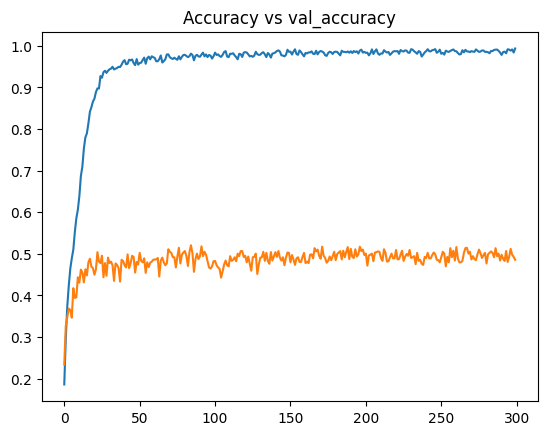

In [47]:
# plt.plot(history['loss'])
plt.plot(history['accuracy'])
# plt.plot(history['val_loss'])
plt.plot(history['val_accuracy'])

plt.title("Accuracy vs val_accuracy")
plt.show()

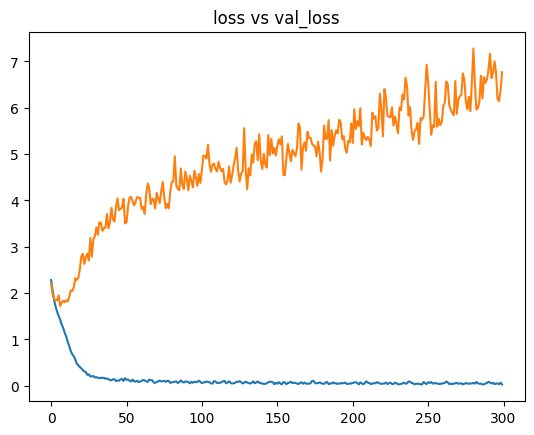

In [48]:
plt.plot(history['loss'])
# plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
# plt.plot(history['val_accuracy'])

plt.title("loss vs val_loss")
plt.show()

In [49]:
from keras.preprocessing import image
# from tensorflow.keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
!pip install load_img
!pip install img_to_array

ERROR: Could not find a version that satisfies the requirement load_img (from versions: none)
ERROR: No matching distribution found for load_img
ERROR: Could not find a version that satisfies the requirement img_to_array (from versions: none)
ERROR: No matching distribution found for img_to_array


In [50]:
print (train_datagen.class_indices)

labels = '\n'.join(sorted(train_datagen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)




{'baby': 0, 'bottle': 1, 'box': 2, 'defect': 3, 'electronics': 4, 'illegal': 5, 'luggage': 6, 'medicine': 7, 'metal': 8, 'pet': 9, 'sport': 10}


In [51]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [53]:
# path ='/content/drive/MyDrive/1_final_dataset/only images_all class/luggage/luggage(100).jpg'
# img=image.load_img(path, target_size=(224,224))

# i=image.img_to_array
import numpy as np
import glob
import os,  random
from keras.preprocessing import image
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/1_final_dataset/Train_Test/Test'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())


ValueError: Sample larger than population or is negative

1/1 [==============================] - 0s 30ms/step
(1, 12)
baby


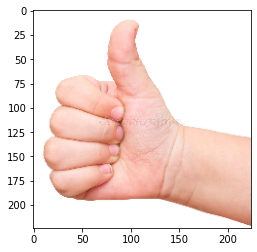

In [ ]:
img_path = '/content/drive/MyDrive/train test/test/baby/baby(549).jpg'

img=np.array(img)
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=cnn.predict(img[np.newaxis])
print(p.shape)
predicted_class = label[np.argmax(p)]
print(predicted_class)


In [ ]:
# plt.imshow(img.squeeze())
# p=history.predict(img[np.newaxis])
# print(p.shape)
# predicted_class = label[np.argmax(p)]
# print(predicted_class)

# if prediction ==0:
#   print("It is a image of baby")
# elif prediction ==1:
#   print("It is a image of bottle")
# elif prediction ==2:
#   print("It is a image of box")
# elif prediction ==3:
#   print("It is a image of defect")
# elif prediction ==4:
#   print("It is a image of electronics")
# elif prediction ==5:
#   print("It is a image of illegal")
# elif prediction ==6:
#   print("It is a image of luggage")
# elif prediction ==7:
#   print("It is a image of medicine")
# elif prediction ==8:
#   print("It is a image of metal")
# elif prediction ==9:
#   print("It is a image of person")
# elif prediction ==10:
#   print("It is a image of pet")
# else:
#   print("It is a image of sport")
